In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#convert movie reviews into pandas dataframe
reviews = pd.read_csv("movie_reviews.csv")
reviews.head()

In [ ]:
# Show total number of reviews
reviews.info

In [5]:
#Show frequency counts for each value of 'Rating'
pd.crosstab(index=reviews['rating'],columns="count")

col_0   count
rating       
1        5865
2        4074
3        4328
4        5733

In [6]:
# Show different ratings as a percentage of total ratings
(reviews['rating'].value_counts()/20000)*100

1    29.325
4    28.665
3    21.640
2    20.370
Name: rating, dtype: float64

In [8]:
# Descriptive Stats
reviews.describe()

rating
count  20000.000000
mean       2.496450
std        1.187374
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        4.000000

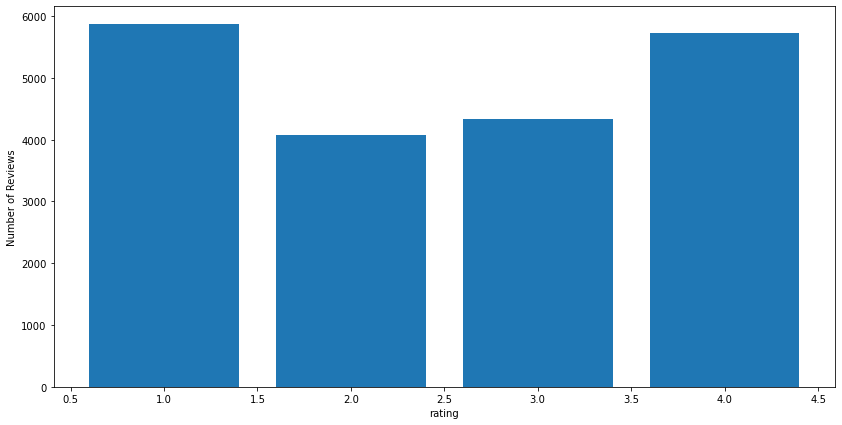

In [9]:
# Plot bar chart to show frequency counts for each value of "rating"
plt.rcParams['figure.figsize'] = (14.0, 7.0)
Rating_count=reviews.groupby('rating').count()
plt.bar(Rating_count.index.values, Rating_count['review'])
plt.xlabel('rating')
plt.ylabel('Number of Reviews')
plt.show()

In [10]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Data is in a pandas dataframe, therefore we must turn each seperate row of text into one long piece of text using a loop function.

In [11]:
#loop thorugh all words in review join them into one long string
text = " ".join(x for x in reviews.review)

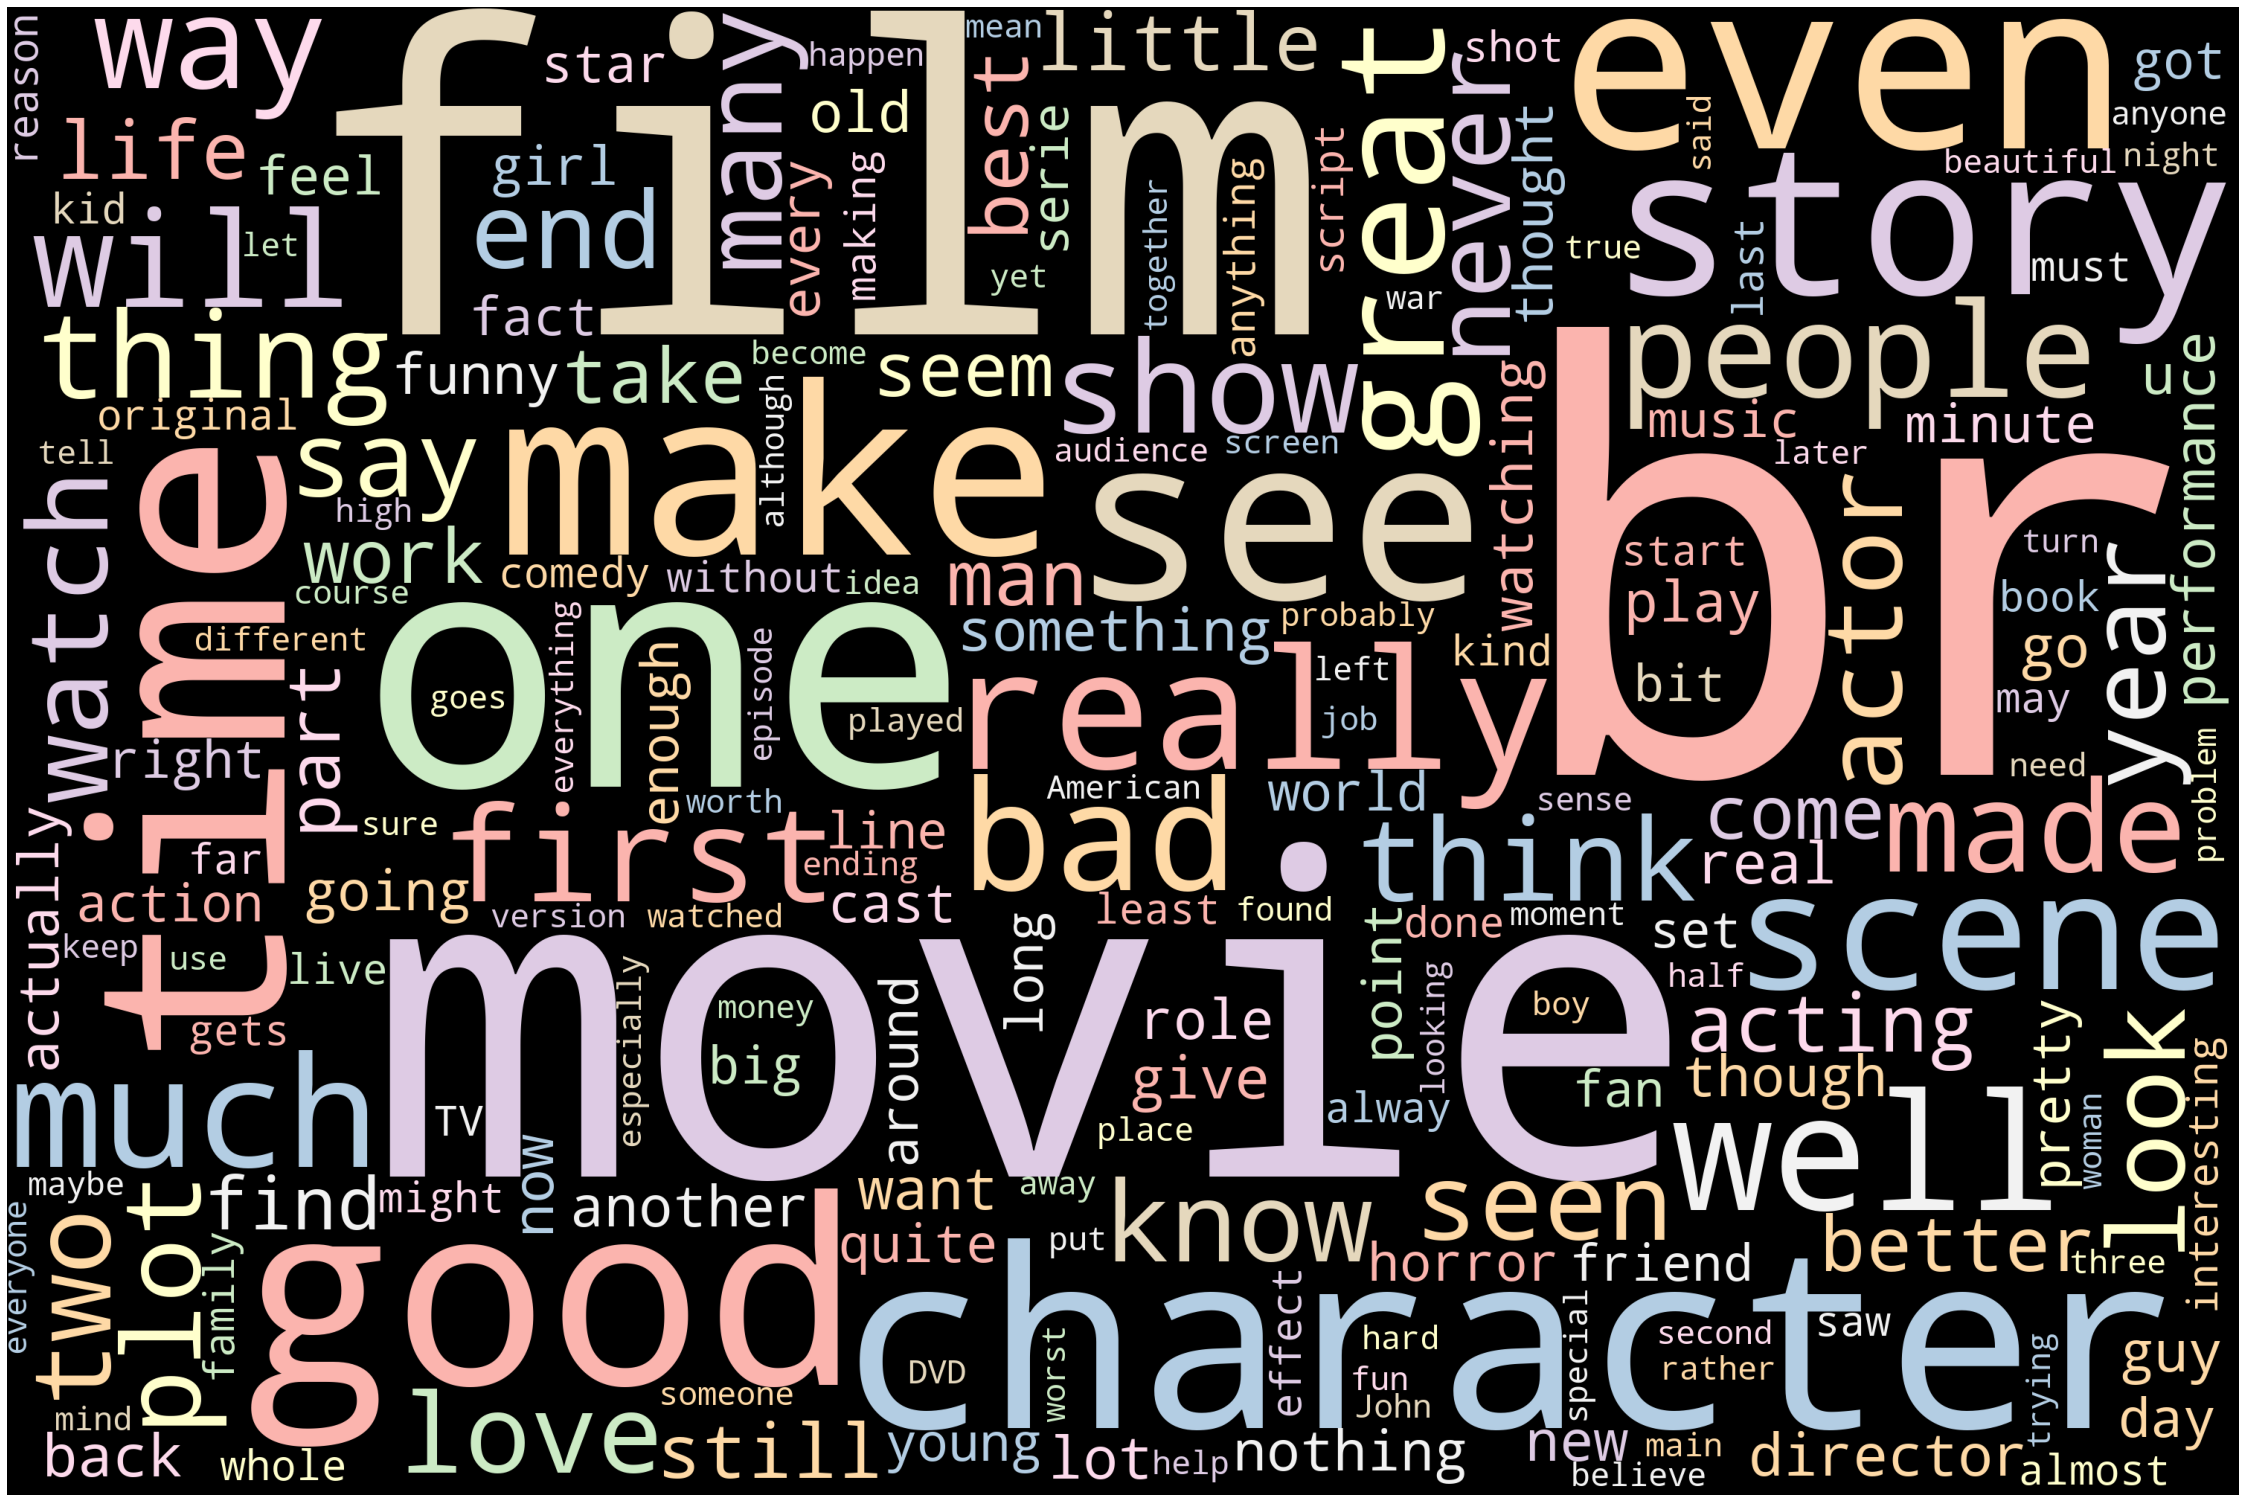

In [12]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)

# Plot
# Set figure size
plt.figure(figsize=(40, 30))
# Display image
plt.imshow(wordcloud) 
# No axis details
plt.axis("off");
#plt.imshow(wordcloud)

Repeating for reviews with a score of 1 (worst reviews)

In [13]:
reviews1=reviews[reviews['rating'] == 1]

In [14]:
text1 = " ".join(x for x in reviews1.review)

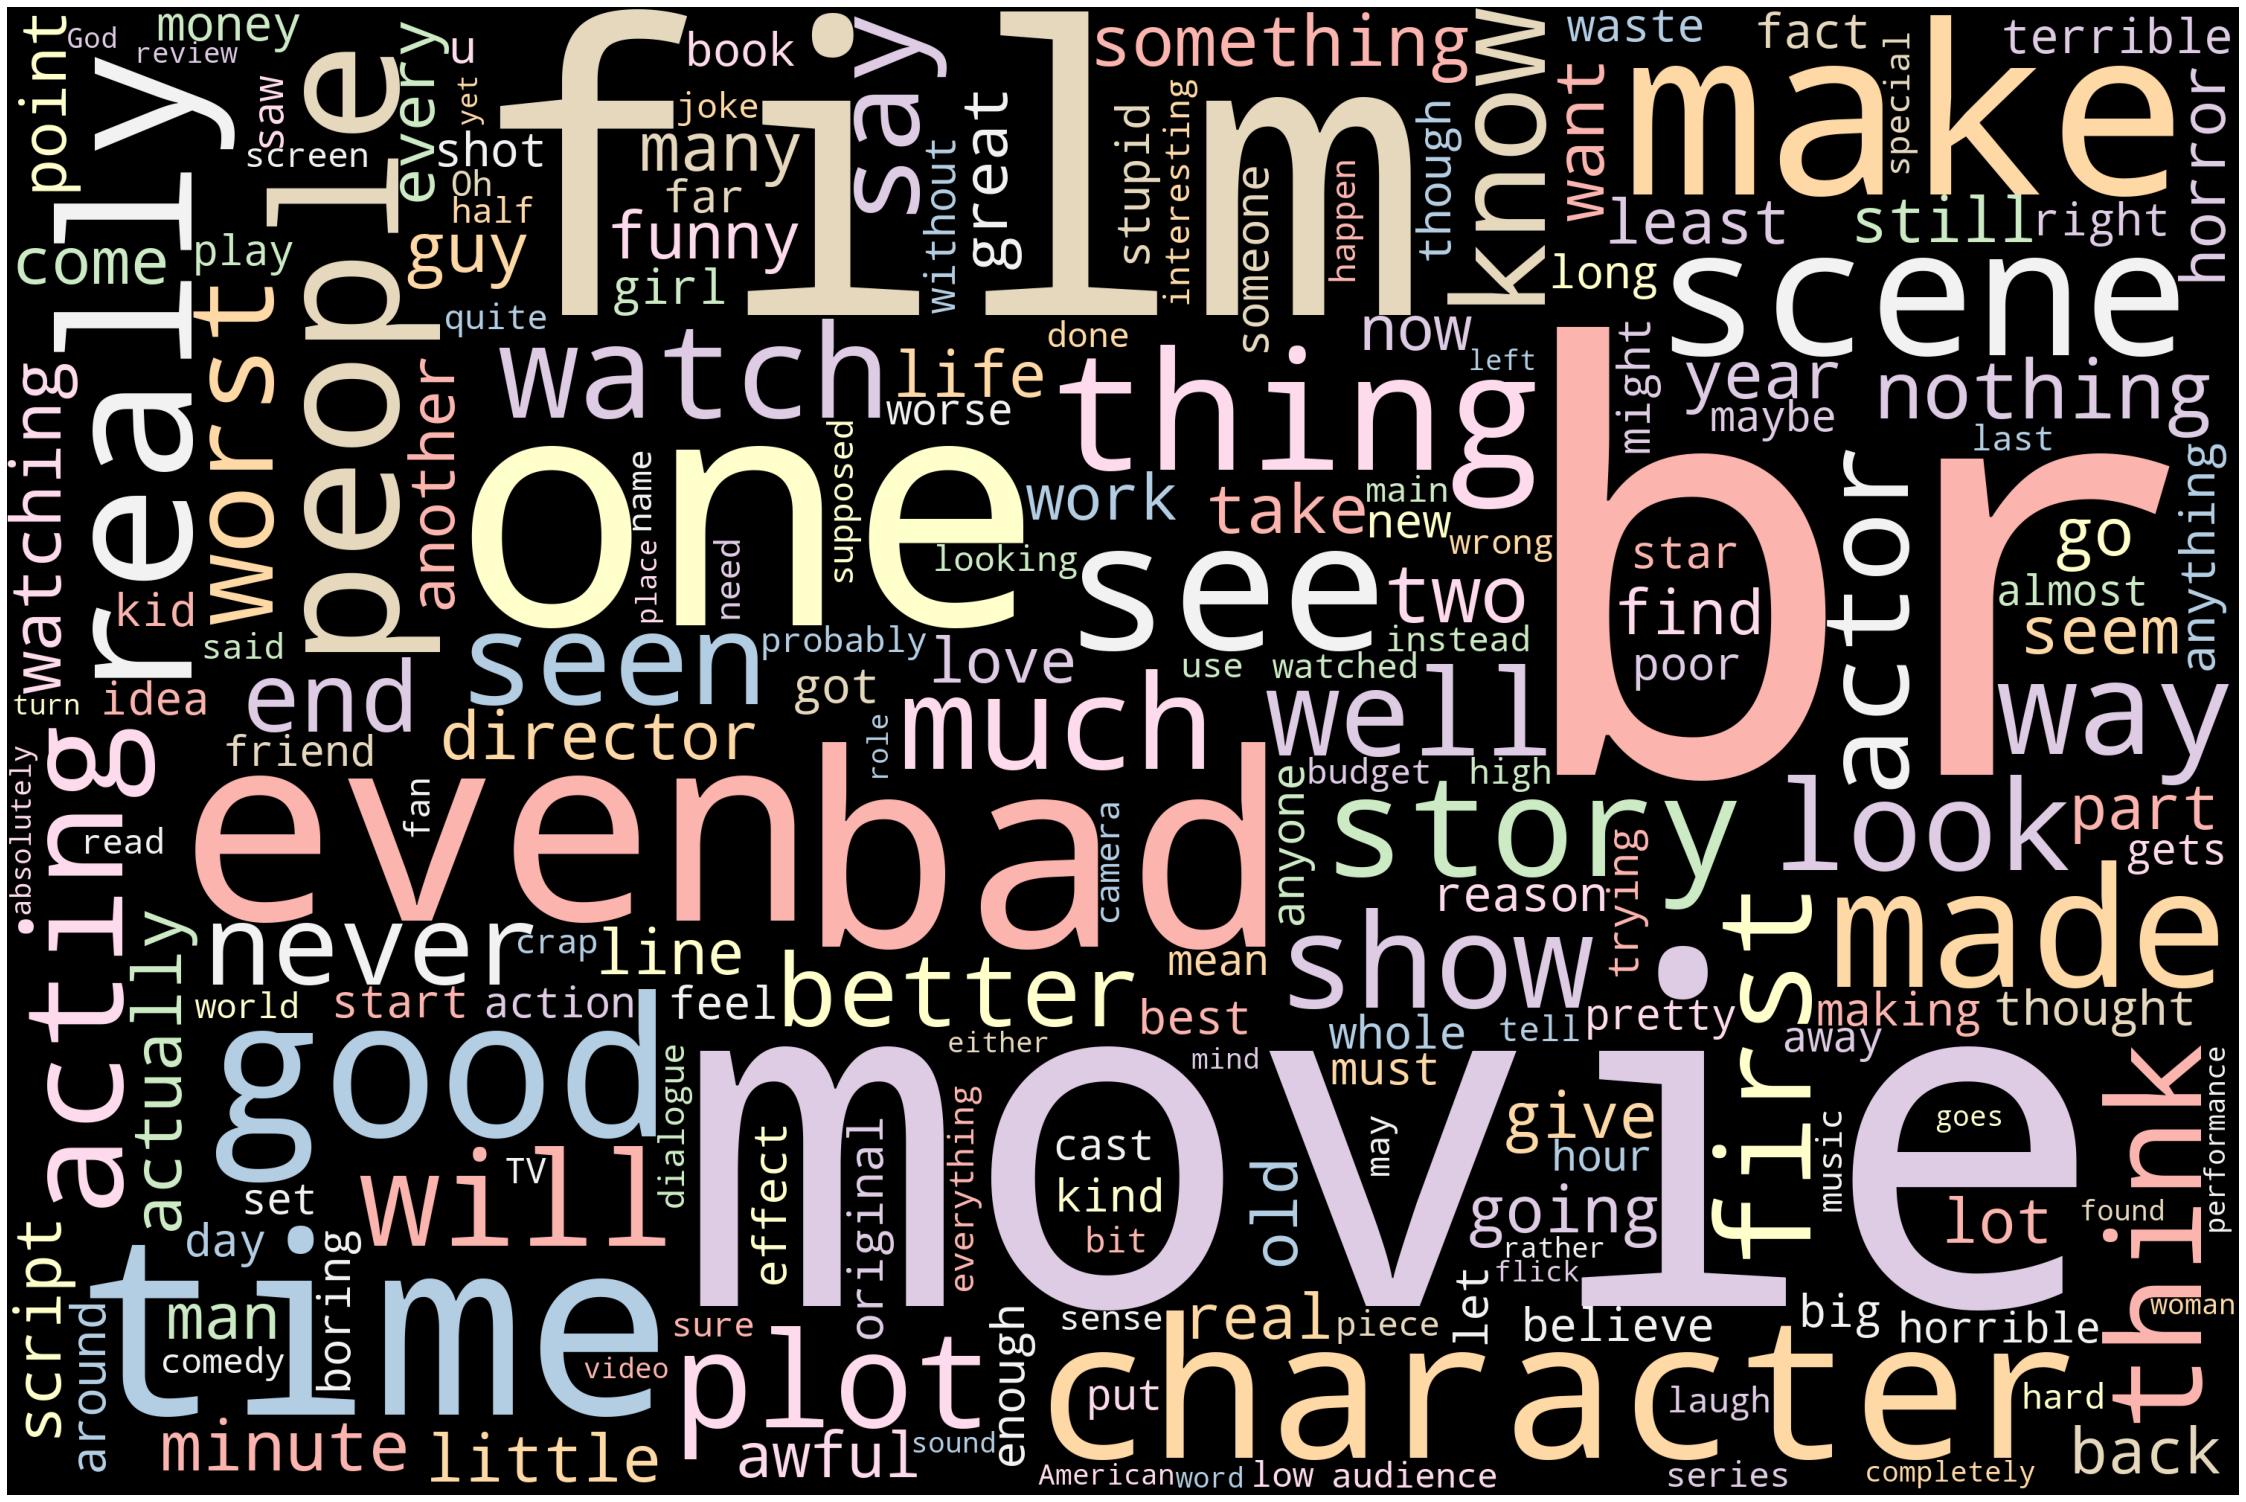

In [15]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text1)

# Plot
# Set figure size
plt.figure(figsize=(40, 30))
# Display image
plt.imshow(wordcloud) 
# No axis details
plt.axis("off");
#plt.imshow(wordcloud)

repeating for reviews with a rating of 4 (best reviews)

In [16]:
reviews4=reviews[reviews['rating'] == 4]

In [17]:
text4 = " ".join(x for x in reviews4.review)

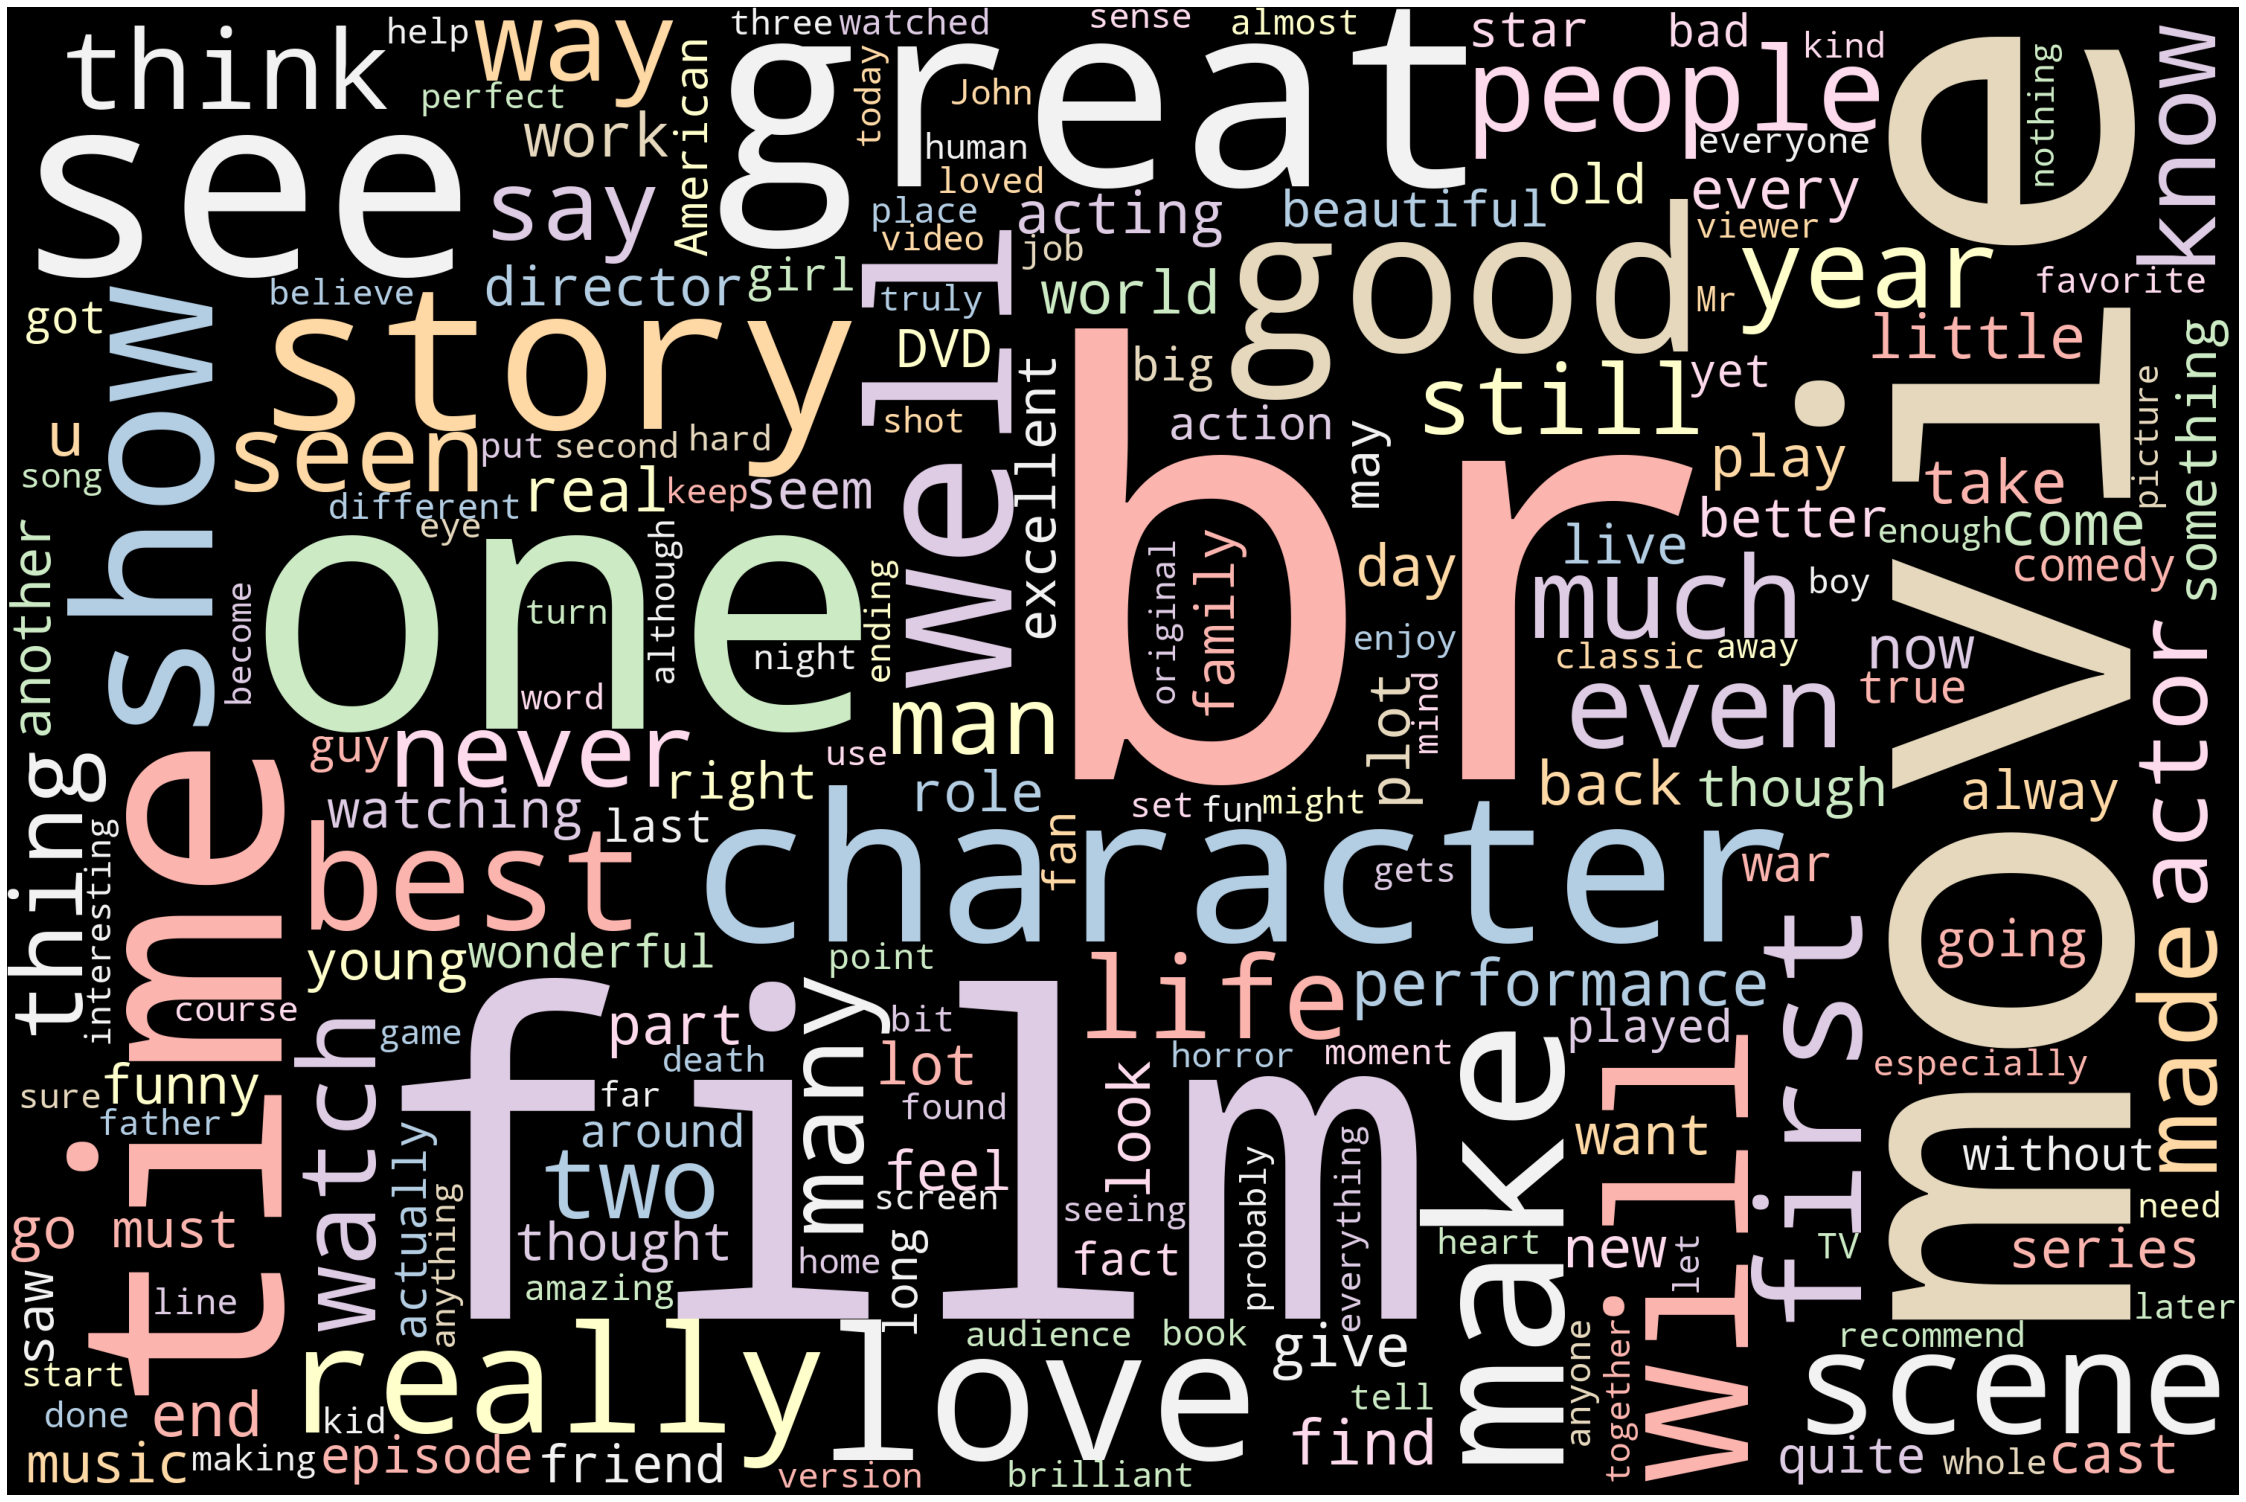

In [18]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text4)

# Plot
# Set figure size
plt.figure(figsize=(40, 30))
# Display image
plt.imshow(wordcloud) 
# No axis details
plt.axis("off");
#plt.imshow(wordcloud)

In [19]:
# Import necessary packages to Convert text into numeric matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

In [20]:
# Tokenizer to remove unwanted elements from data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
#tf = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(reviews['review'])

In [21]:
print(cv.get_feature_names())

['aa', 'aaa', 'aaaaaaaargh', 'aaaaaaah', 'aaaaah', 'aaaaahhhh', 'aaaaargh', 'aaaaaw', 'aaaand', 'aaaggghhhhhhh', 'aaah', 'aaall', 'aaargh', 'aaarrrgh', 'aag', 'aage', 'aagh', 'aah', 'aahed', 'aaila', 'aaja', 'aakash', 'aake', 'aaliyah', 'aames', 'aamir', 'aamto', 'aan', 'aankhen', 'aap', 'aapke', 'aaran', 'aardman', 'aardvark', 'aardvarks', 'aargh', 'aarika', 'aaron', 'aarrrgh', 'aashok', 'aasmaan', 'aatish', 'aau', 'aavjo', 'aawip', 'ab', 'aback', 'abadi', 'abahy', 'abanazer', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons', 'abanks', 'abatement', 'abating', 'abattoirs', 'abba', 'abbas', 'abbasi', 'abbe', 'abbey', 'abbie', 'abbot', 'abbots', 'abbott', 'abbreviate', 'abbreviated', 'abby', 'abc', 'abcd', 'abd', 'abdalla', 'abdicating', 'abdomen', 'abdominal', 'abduct', 'abducted', 'abductee', 'abducting', 'abduction', 'abductions', 'abductor', 'abductors', 'abducts', 'abdullah', 'abdulrahman', 'abe', 'abedded', 'abel', 'abercrombie', 'aberdeen', 'abernethie', 'aberrant',

In [22]:
# Find number of words (columns)
text_counts.shape

(20000, 68198)

In [23]:
#Split data into test and training data with a test fraction of 0.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, reviews['rating'], test_size=0.3, random_state=1)

In [24]:
# Run the naive bayes model using multinomialNB and then predict outcomes in the test data
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

In [25]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predicted)) 

MultinomialNB Accuracy: 0.5863333333333334
Confusion Matrix:
[[1449  203   50   76]
 [ 587  419  178  100]
 [ 148   97  483  518]
 [ 170   36  319 1167]]


In [26]:
# Print out classification report
print("Classification Report:")
print(metrics.classification_report(y_test, predicted))

Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.81      0.70      1778
           2       0.55      0.33      0.41      1284
           3       0.47      0.39      0.42      1246
           4       0.63      0.69      0.66      1692

    accuracy                           0.59      6000
   macro avg       0.57      0.55      0.55      6000
weighted avg       0.58      0.59      0.57      6000



### Re-running model with bi-grams

In [27]:
# Tokenizer to remove unwanted elements from data like symbols and numbers
token1 = RegexpTokenizer(r'[a-zA-Z]+')
# Specify bi-grams (1,2)
cv1 = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,2),tokenizer = token1.tokenize)
text_counts1= cv1.fit_transform(reviews['review'])

*Too many pairs of words to display*

In [28]:
# Find number of pairs (columns)
text_counts1.shape

(20000, 1428781)

We have 20,000 reviews (rows) and 1,428,781 pairs of words (columns)

In [29]:
#Split data into test and training data with a test fraction of 0.3
X_train1, X_test1, y_train1, y_test1 = train_test_split(text_counts1, reviews['rating'], test_size=0.3, random_state=1)

In [30]:
# Run the naive bayes model using multinomialNB and then predict outcomes in the test data
# Model Generation Using Multinomial Naive Bayes
clf1 = MultinomialNB().fit(X_train1, y_train1)
predicted1= clf1.predict(X_test1)

In [31]:
# Print confusion matrix for bi-grams model
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test1, predicted1))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test1, predicted1)) 

MultinomialNB Accuracy: 0.5813333333333334
Confusion Matrix:
[[1614   49   32   83]
 [ 811  194  127  152]
 [ 202   19  368  657]
 [ 179    6  195 1312]]


In [32]:
# Print out classification report for bi-grams model
print("Classification Report:")
print(metrics.classification_report(y_test1, predicted1))

Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.91      0.70      1778
           2       0.72      0.15      0.25      1284
           3       0.51      0.30      0.37      1246
           4       0.60      0.78      0.67      1692

    accuracy                           0.58      6000
   macro avg       0.60      0.53      0.50      6000
weighted avg       0.60      0.58      0.53      6000



### TF -IDF

In [141]:
data=pd.read_csv("movie_reviews.csv")

In [142]:
x=data.review
y=data.rating
print(x)
print(y)

0        I went to see this movie with the most positiv...
1        I caught this film late on a sat night/ Sunday...
2        This film is worth seeing since it is a classi...
3        Albert Finney and Tom Courtenay are brilliant ...
4        This is probably one of the worst French movie...
                               ...                        
19995    Why did they have to make such a dreadful adap...
19996    This was a truly insipid film. The performance...
19997    Deliverance is a stunning thriller, every bit ...
19998    Why can't a movie be rated a zero? Or even a n...
19999    BABY FACE is a fast paced, wise cracking, know...
Name: review, Length: 20000, dtype: object
0        2
1        3
2        2
3        4
4        2
        ..
19995    1
19996    1
19997    4
19998    1
19999    3
Name: rating, Length: 20000, dtype: int64


In [143]:
#import TFidfVectorizer and transform text (reviews-x) into numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
data = vectorizer.fit_transform(x)

In [144]:
#Split data into test and training data with a test fraction of 0.3
xtrain, xtest, ytrain, ytest = train_test_split(data,y,test_size=0.3, random_state=1)

In [145]:
# Run the naive bayes model using multinomialNB and then predict outcomes in the test data
# Model Generation Using Multinomial Naive Bayes
clf2 = MultinomialNB().fit(xtrain, ytrain)
predicted2= clf2.predict(xtest)

In [146]:
# Print confusion matrix for tf-idf model
print("MultinomialNB Accuracy:",metrics.accuracy_score(ytest, predicted2))
print("Confusion Matrix:")
print(metrics.confusion_matrix(ytest, predicted2)) 

MultinomialNB Accuracy: 0.5271666666666667
Confusion Matrix:
[[1698    0    1   79]
 [1050    1    6  227]
 [ 322    1   19  904]
 [ 245    0    2 1445]]


In [147]:
# Print out classification report for tf-idf model
print("Classification Report:")
print(metrics.classification_report(ytest, predicted2))

Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.96      0.67      1778
           2       0.50      0.00      0.00      1284
           3       0.68      0.02      0.03      1246
           4       0.54      0.85      0.66      1692

    accuracy                           0.53      6000
   macro avg       0.56      0.46      0.34      6000
weighted avg       0.55      0.53      0.39      6000

